# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = 'https://api.openweathermap.org'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = str(url + f'/data/2.5/weather?q={city}&appid={weather_api_key}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response_json = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat']
        city_lng = response_json['coord']['lon']
        city_max_temp = response_json['main']['temp_max']
        city_humidity = response_json['main']['humidity']
        city_clouds = response_json['clouds']['all']
        city_wind = response_json['wind']['speed']
        city_country = response_json['sys']['country']
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | itoman
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | owando
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | brookings
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | port macquarie
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | dickinson
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | gbadolite
Processing Record 21 of Set 1 | chanute
Processing Record 22 of Set 1 | bamboo f

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,280.98,75,86,2.00,GL,1691700549
1,petropavlovsk-kamchatsky,53.0452,158.6483,282.48,87,0,4.00,RU,1691700549
2,punta arenas,-53.1500,-70.9167,276.55,72,100,6.81,CL,1691700289
3,itoman,26.1247,127.6694,300.58,94,20,3.60,JP,1691700549
4,invercargill,-46.4000,168.3500,274.83,91,100,2.68,NZ,1691700469


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

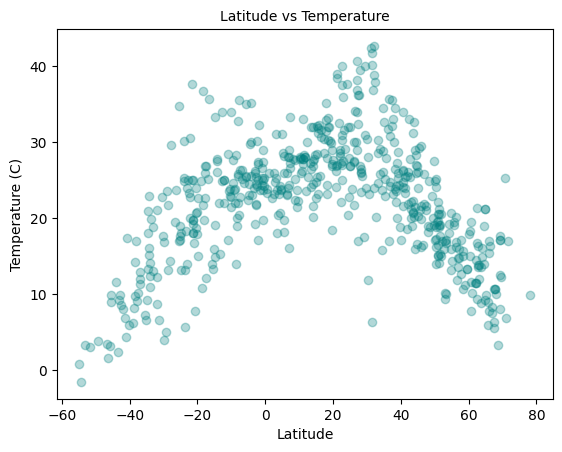

In [42]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp']-273.15, c='teal', alpha=0.3)

# Incorporate the other graph properties
plt.title('Latitude vs Temperature', fontsize=10)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

#Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

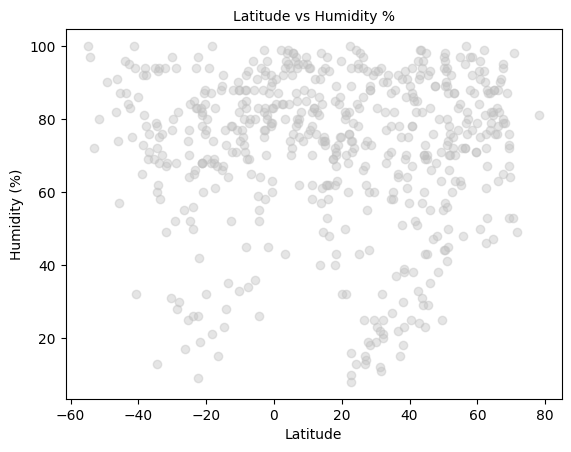

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='silver', alpha=0.4)

# Incorporate the other graph properties
plt.title('Latitude vs Humidity %', fontsize=10)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

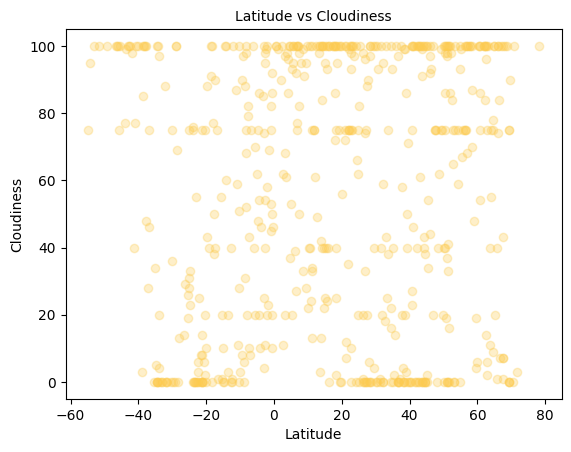

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='#FCCB4F', alpha=0.3)

# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness', fontsize=10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

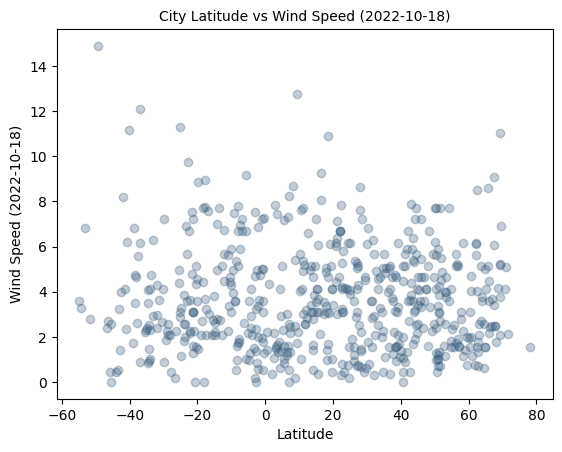

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='#355C7D', alpha=0.3)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2022-10-18)', fontsize=10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def linregplot(x_data, y_data, x_label, y_label, title):
    plt.figure(figsize=(8, 6))
    
    # Perform linear regression
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept
    
    plt.scatter(x_data, y_data, s=50)
    plt.plot(x_data, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,280.98,75,86,2.00,GL,1691700549
1,petropavlovsk-kamchatsky,53.0452,158.6483,282.48,87,0,4.00,RU,1691700549
3,itoman,26.1247,127.6694,300.58,94,20,3.60,JP,1691700549
8,brookings,44.3114,-96.7984,302.14,70,40,7.20,US,1691700534
9,ilulissat,69.2167,-51.1000,281.16,76,75,2.06,GL,1691700550


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,punta arenas,-53.1500,-70.9167,276.55,72,100,6.81,CL,1691700289
4,invercargill,-46.4000,168.3500,274.83,91,100,2.68,NZ,1691700469
5,puerto natales,-51.7236,-72.4875,276.17,80,100,2.81,CL,1691700549
6,owando,-0.4819,15.8999,298.45,63,50,1.30,CG,1691700549
7,blackmans bay,-43.0167,147.3167,282.42,84,100,3.22,AU,1691700549


###  Temperature vs. Latitude Linear Regression Plot

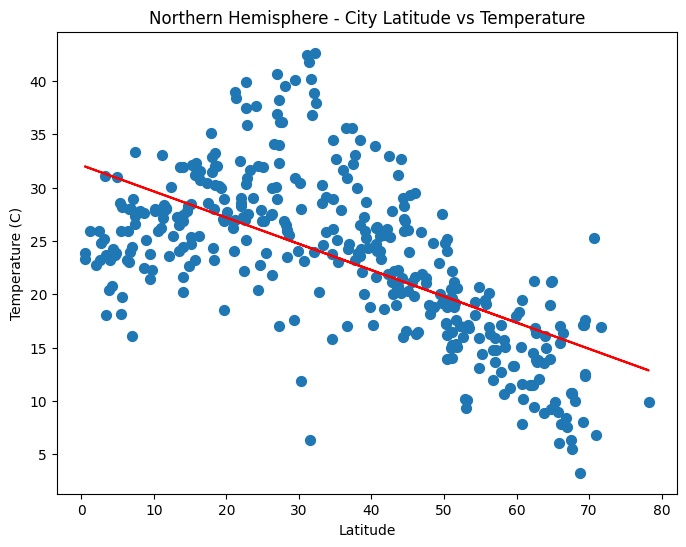

In [73]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp']-273.15, 'Latitude', 'Temperature (C)', 'Northern Hemisphere - City Latitude vs Temperature')

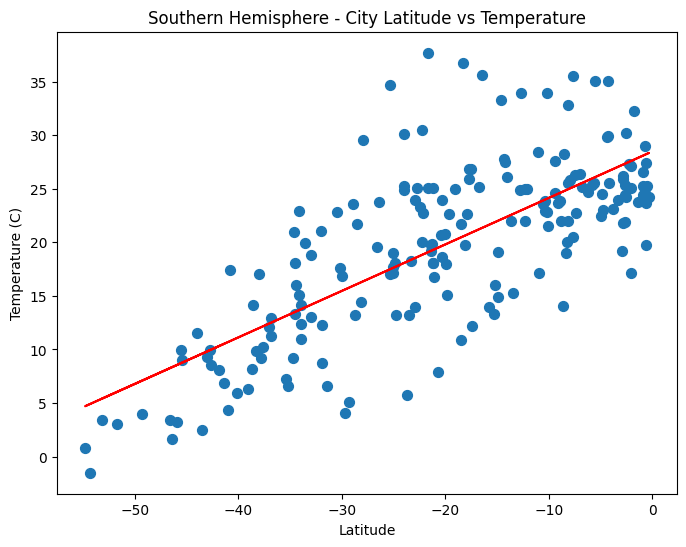

In [74]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp']-273.15, 'Latitude', 'Temperature (C)', 'Southern Hemisphere - City Latitude vs Temperature')

**Discussion about the linear relationship:**
- As latitude nears 0, temperature increases.
- Latitude 0 is the Equator, which we know is generally the warmest part of Earth.
- The reason temperatures are warmer closer to the Equator is because solar radiation is concentrated on a smaller surface area 

### Humidity vs. Latitude Linear Regression Plot

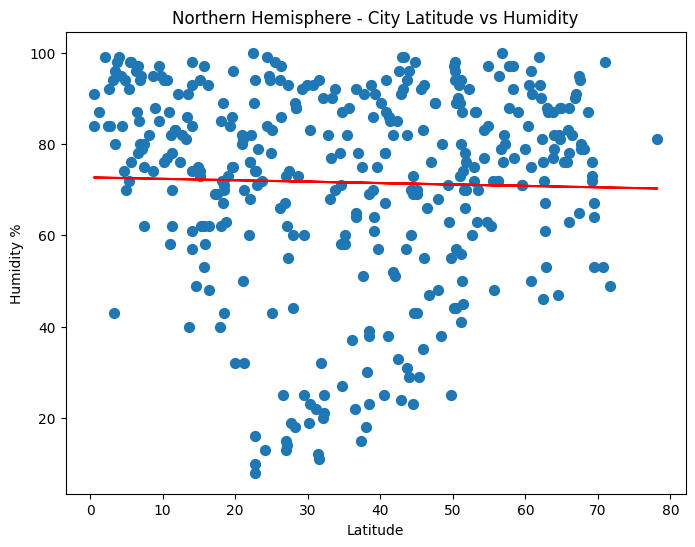

In [75]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity %', 'Northern Hemisphere - City Latitude vs Humidity')

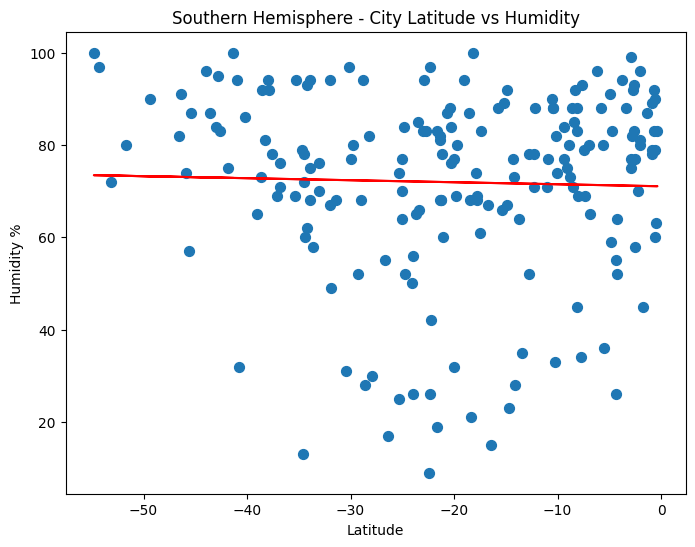

In [76]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity %', 'Southern Hemisphere - City Latitude vs Humidity')

**Discussion about the linear relationship:**
- In both Hemispheres, the regression line is roughly horizontal
- This means r is close to 0, which means there is no strong correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

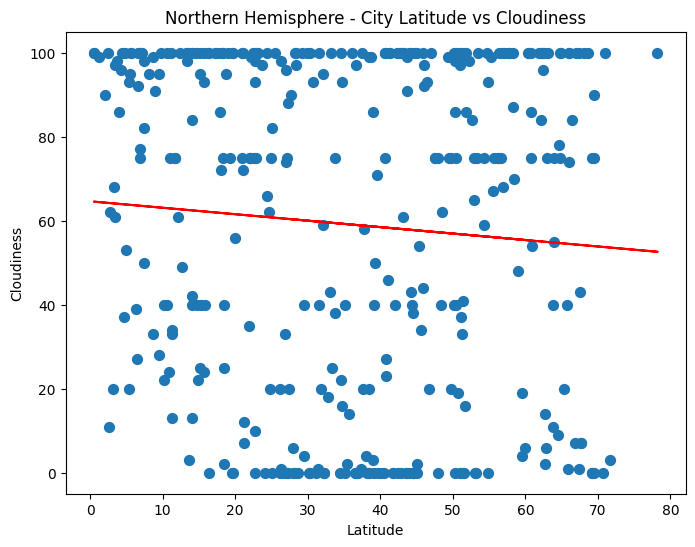

In [77]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Northern Hemisphere - City Latitude vs Cloudiness')

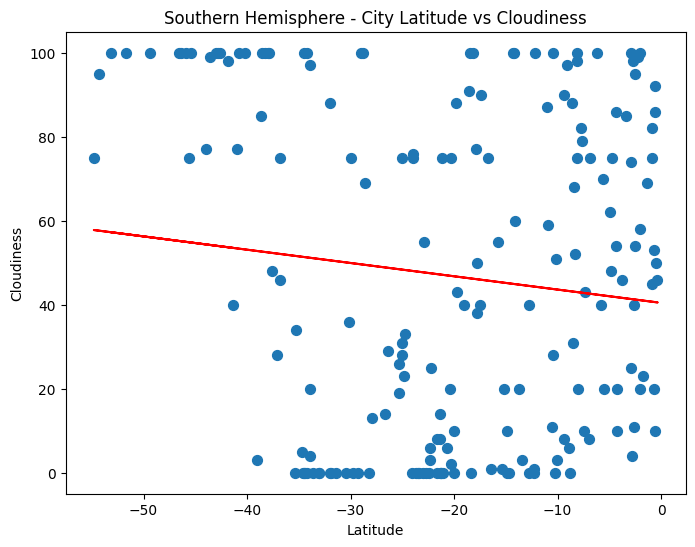

In [78]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', 'Southern Hemisphere - City Latitude vs Cloudiness')

**Discussion about the linear relationship:** 
- Lin reg lines are slightly downward sloping
- This means that on average, cloudiness increases very slightly towards lower latitudes 

### Wind Speed vs. Latitude Linear Regression Plot

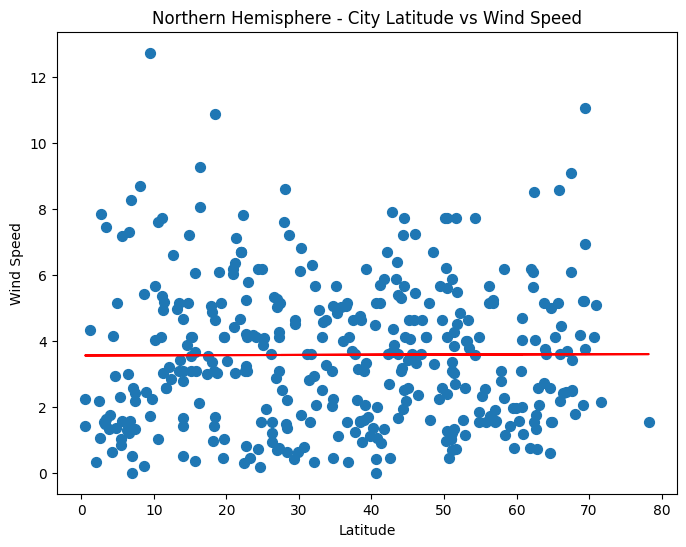

In [79]:
# Northern Hemisphere
linregplot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Northern Hemisphere - City Latitude vs Wind Speed')

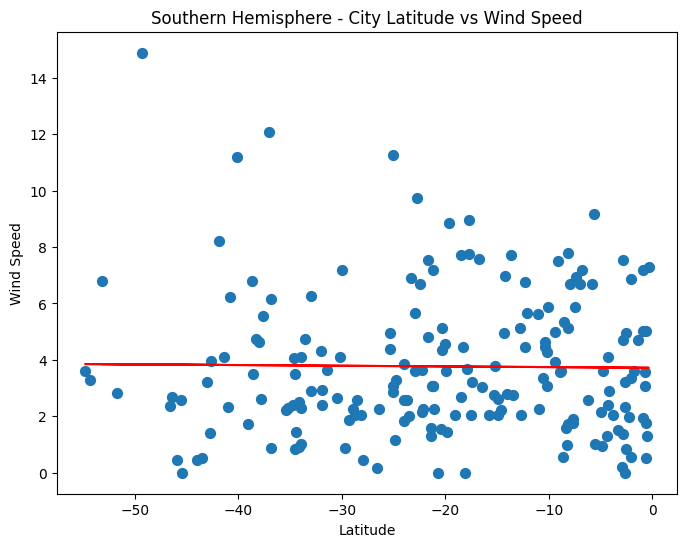

In [80]:
# Southern Hemisphere
linregplot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', 'Southern Hemisphere - City Latitude vs Wind Speed')

**Discussion about the linear relationship:**
- Latitude does not have any noticable effect on wind speed
- The lack of slope in the regression line tells us that wind speed stays roughly the same along most latitudes